In [37]:
# load a coffea file
from coffea.util import load
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import vector

import matplotlib
matplotlib.rcParams["figure.dpi"] = 300
hep.style.use("CMS")

vector.register_awkward()


In [38]:
# dataset_name="GluGlutoHHto4B_spanet_kl-1p00_kt-1p00_c2-0p00"
dataset_name="VBFHHto4B_CV_1_C2V_1_C3_1_"
MATCHING=False

input = f"/work/mmalucch/out_hh4b/VBF/out_ggf_vbf_spanet_input_SM/output_{dataset_name}_2022_postEE.coffea"

o = load(f"{input}")

sample=list(o["columns"].keys())[0]
dataset=list(o["columns"][sample].keys())[0]
category=list(o["columns"][sample][dataset].keys())[1]
print(o["columns"][sample][dataset].keys())
col=o["columns"][sample][dataset][category]
for k in col.keys():
    print(k)
    col[k]=col[k].value#[col[k].value!=-999]

num_events=len(col["weight"])
print(f"Number of events: {num_events}")

jets_list= ["JetTotalSPANetPadded", "JetGoodPadded", "JetGoodVBFMergedPadded", "Jet"]

dict_keys(['4b_region', 'vbf_4b_region'])
weight
JetTotalSPANetPadded_N
JetTotalSPANetPadded_provenance
JetTotalSPANetPadded_provenance_higgs
JetTotalSPANetPadded_provenance_vbf
JetTotalSPANetPadded_pt
JetTotalSPANetPadded_eta
JetTotalSPANetPadded_phi
JetTotalSPANetPadded_mass
JetTotalSPANetPadded_btagPNetB_5wp
JetTotalSPANetPadded_btagPNetB_3wp
JetTotalSPANetPadded_btagPNetB
JetGoodPadded_N
JetGoodPadded_provenance
JetGoodPadded_provenance_higgs
JetGoodPadded_provenance_vbf
JetGoodPadded_pt
JetGoodPadded_eta
JetGoodPadded_phi
JetGoodPadded_mass
JetGoodPadded_btagPNetB_5wp
JetGoodPadded_btagPNetB_3wp
JetGoodPadded_btagPNetB
JetGoodVBFMergedPadded_N
JetGoodVBFMergedPadded_provenance
JetGoodVBFMergedPadded_provenance_higgs
JetGoodVBFMergedPadded_provenance_vbf
JetGoodVBFMergedPadded_pt
JetGoodVBFMergedPadded_eta
JetGoodVBFMergedPadded_phi
JetGoodVBFMergedPadded_mass
JetGoodVBFMergedPadded_btagPNetB_5wp
JetGoodVBFMergedPadded_btagPNetB_3wp
JetGoodVBFMergedPadded_btagPNetB
Jet_N
Jet_proven

In [39]:
def autolabel(ax, bars):
    for bar in bars:
        height = bar.get_height()
        # transform to percentage
        percentage = height * 100
        
        ax.annotate(f'{percentage:.1f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)
        
        
def plot_efficiencies(list_cuts, efficiencies, title):
    # plot the efficiencies
    cut_names=list_cuts
    x = np.arange(len(cut_names))
    eff_vals = [e for e in efficiencies]
    fig, ax = plt.subplots()#figsize=(19, 13))
    #plot the 3 bars
    width = 0.5
    bars1 = ax.bar(x, eff_vals, width)
    # print also the values on top of the bars
    autolabel(ax, bars1)
    

    ax.set_ylabel('Efficiency %')
    # ax.set_title(title, fontsize=16)
    # add a text
    ax.text(0.97, 0.95, f'{title}', transform=ax.transAxes, fontsize=15, horizontalalignment='right')
    ax.set_xticks(x)
    ax.set_xticklabels(cut_names, rotation=45, ha='right')
    ax.legend(fontsize='small')
    ax.set_ylim(0, 1.2)
    hep.style.use(hep.style.CMS)
    hep.cms.lumitext("2022_postEE (13.6 TeV)", ax=ax)
    hep.cms.text("Preliminary", ax=ax)
    plt.tight_layout()
    plt.show()

# Compute the Efficiency for number of jet

In [40]:
if MATCHING:
    for jet_type in jets_list:
        prov=ak.values_astype(col[f"{jet_type}_provenance"], np.int64)
        pt_unflatten=ak.unflatten(col[f"{jet_type}_pt"], col[f"{jet_type}_N"])
        print(pt_unflatten[2])
        #count how many 1, 2, 3
        counts = []
        for i in [1, 2, 3]:
            counts.append(ak.sum(prov == i))
        
        num_max_matched_jets=[2*num_events, 2*num_events, 2*num_events]
        efficiencies = np.array(counts) / np.array(num_max_matched_jets)
        labels = ['Higgs 1', 'Higgs 2', 'VBF']

        print(counts)
        print("num events:", num_events)
        
        title= f"{jet_type} - {dataset_name.rstrip('_')}"

        plot_efficiencies(labels,efficiencies,title)



# Compute the Efficiency for each event (fully matched for each resonance)

In [41]:
if MATCHING:
    for jet_type in jets_list:
        prov=ak.values_astype(col[f"{jet_type}_provenance"], np.int64)
        prov_uflattened=ak.unflatten(prov, col[f"{jet_type}_N"])
        print(prov_uflattened[0])
        # count how many 1, 2, 3 per event
        counts = []
        for i in [1, 2, 3]:
            counts.append(ak.sum(ak.sum(prov_uflattened == i, axis=1) ==2))

        efficiencies = np.array(counts) / np.array(num_events)
        
        print(counts)
        print("num events:", num_events)
        labels = ['Higgs 1', 'Higgs 2', 'VBF']
        title= f"{jet_type} - {dataset_name.rstrip('_')}"

        plot_efficiencies(labels,efficiencies,title)



# Compute the Efficiency for each event (fully matched for each resonance with Higgs combined)

In [42]:
if MATCHING:
    for jet_type in jets_list:
        prov=ak.values_astype(col[f"{jet_type}_provenance"], np.int64)
        prov_uflattened=ak.unflatten(prov, col[f"{jet_type}_N"])
        print(prov_uflattened[0])
        # count how many 1, 2, 3 per event
        counts = []
        for i in [[1, 2], [3]]:
            counts.append(ak.sum((ak.sum(prov_uflattened == i[0], axis=1) ==2) & (ak.sum(prov_uflattened == i[-1], axis=1) ==2)))

        efficiencies = np.array(counts) / np.array(num_events)
        
        print(counts)
        print("num events:", num_events)
        labels = ['Higgs 1 + Higgs 2', 'VBF']
        title= f"{jet_type} - {dataset_name.rstrip('_')}"

        plot_efficiencies(labels,efficiencies,title)



# Compute the Efficiency for each event (fully matched all resonances)

In [43]:
if MATCHING:
    for jet_type in jets_list:
        prov=ak.values_astype(col[f"{jet_type}_provenance"], np.int64)
        prov_uflattened=ak.unflatten(prov, col[f"{jet_type}_N"])
        print(prov_uflattened[0])
        # count how many 1, 2, 3 per event
        counts = []
        for i in [[1, 2,3]]:
            counts.append(ak.sum((ak.sum(prov_uflattened == i[0], axis=1) ==2) & (ak.sum(prov_uflattened == i[1], axis=1) ==2)& (ak.sum(prov_uflattened == i[2], axis=1) ==2)))

        efficiencies = np.array(counts) / np.array(num_events)
        
        print(counts)
        print("num events:", num_events)
        labels = ['Higgs 1 + Higgs 2 + VBF']
        title= f"{jet_type} - {dataset_name.rstrip('_')}"

        plot_efficiencies(labels,efficiencies,title)



# plot kineatics of vbf jets

[[7.98, 2.96, -999, -999], [14, 4.4, -999, ... -999, -999], [31.9, 3.66, 2.31, -999]]
[[50.8, 41.3, -999, -999], [187, 26.4, ... -999, -999], [193, 55.3, 26.3, -999]]
[424, 2.69e+03, 947, 4.72e+03, 468, ... 1.15e+03, 1.9e+03, 4.27e+03, 2.11e+03]
[4.45, 7.29, 5.85, 7.93, 4.05, 6.5, 5.08, ... 3.95, 5.81, 6.57, 7.32, 8.21, 6.03]


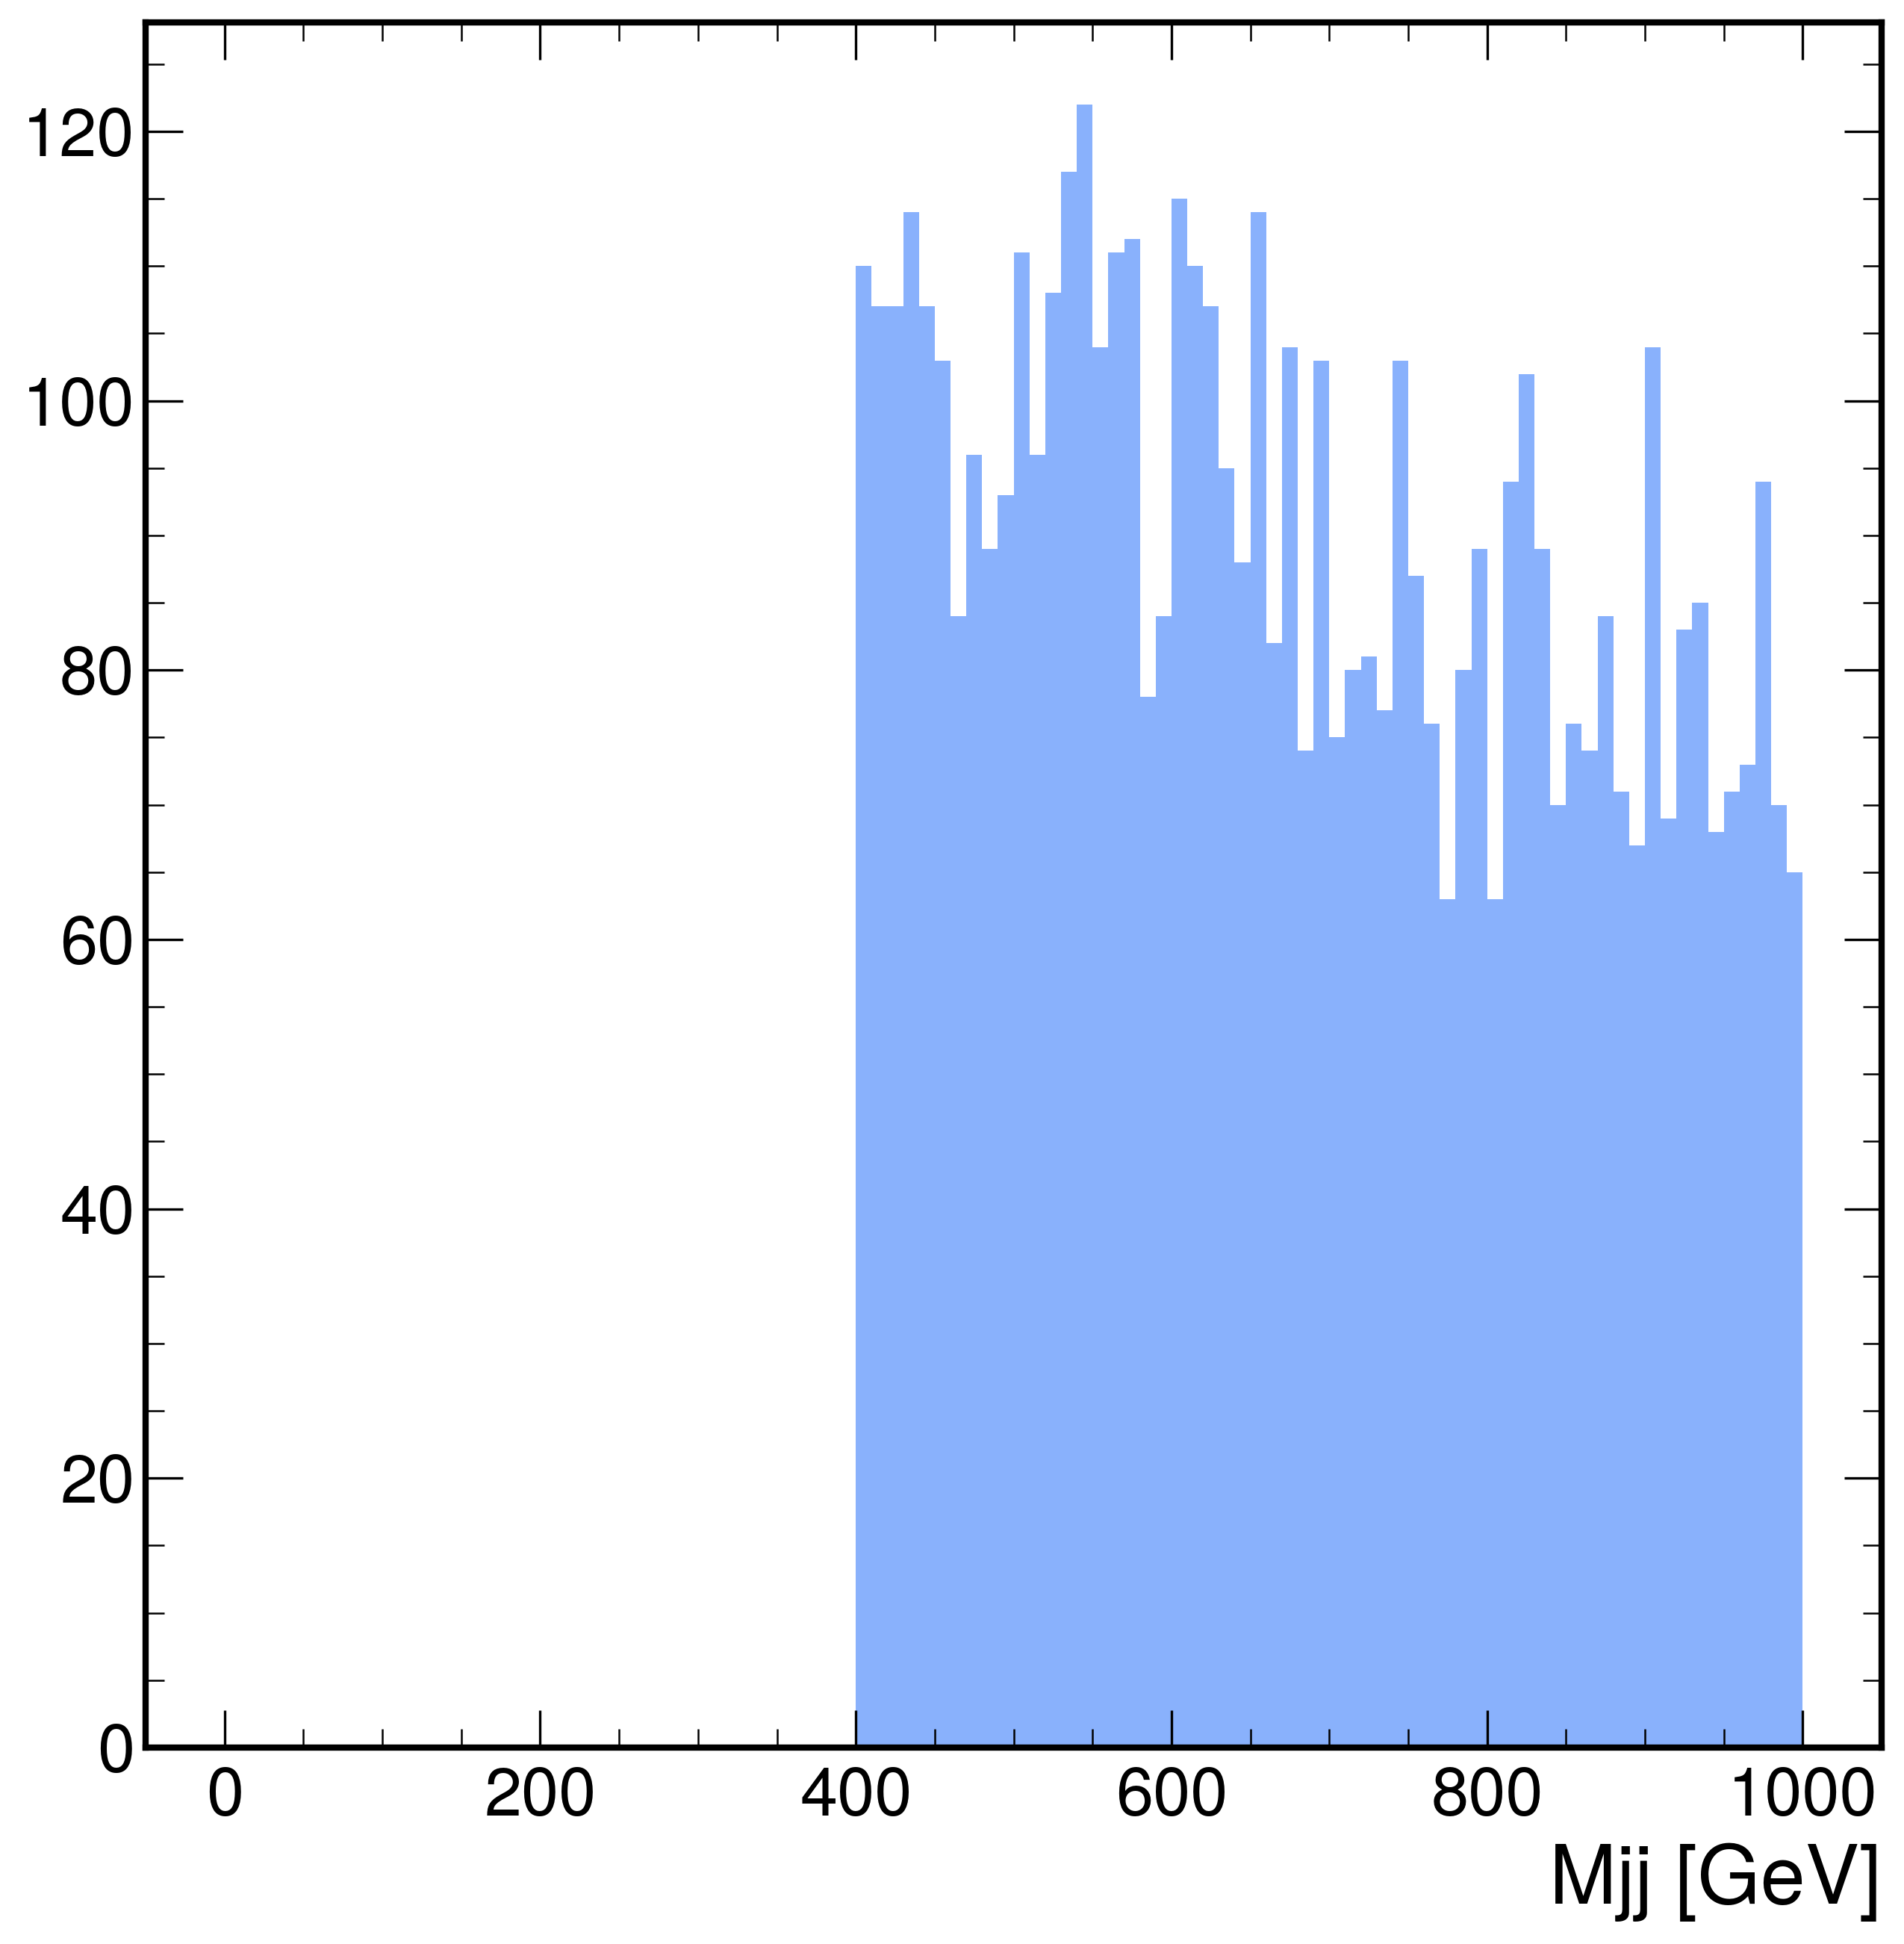

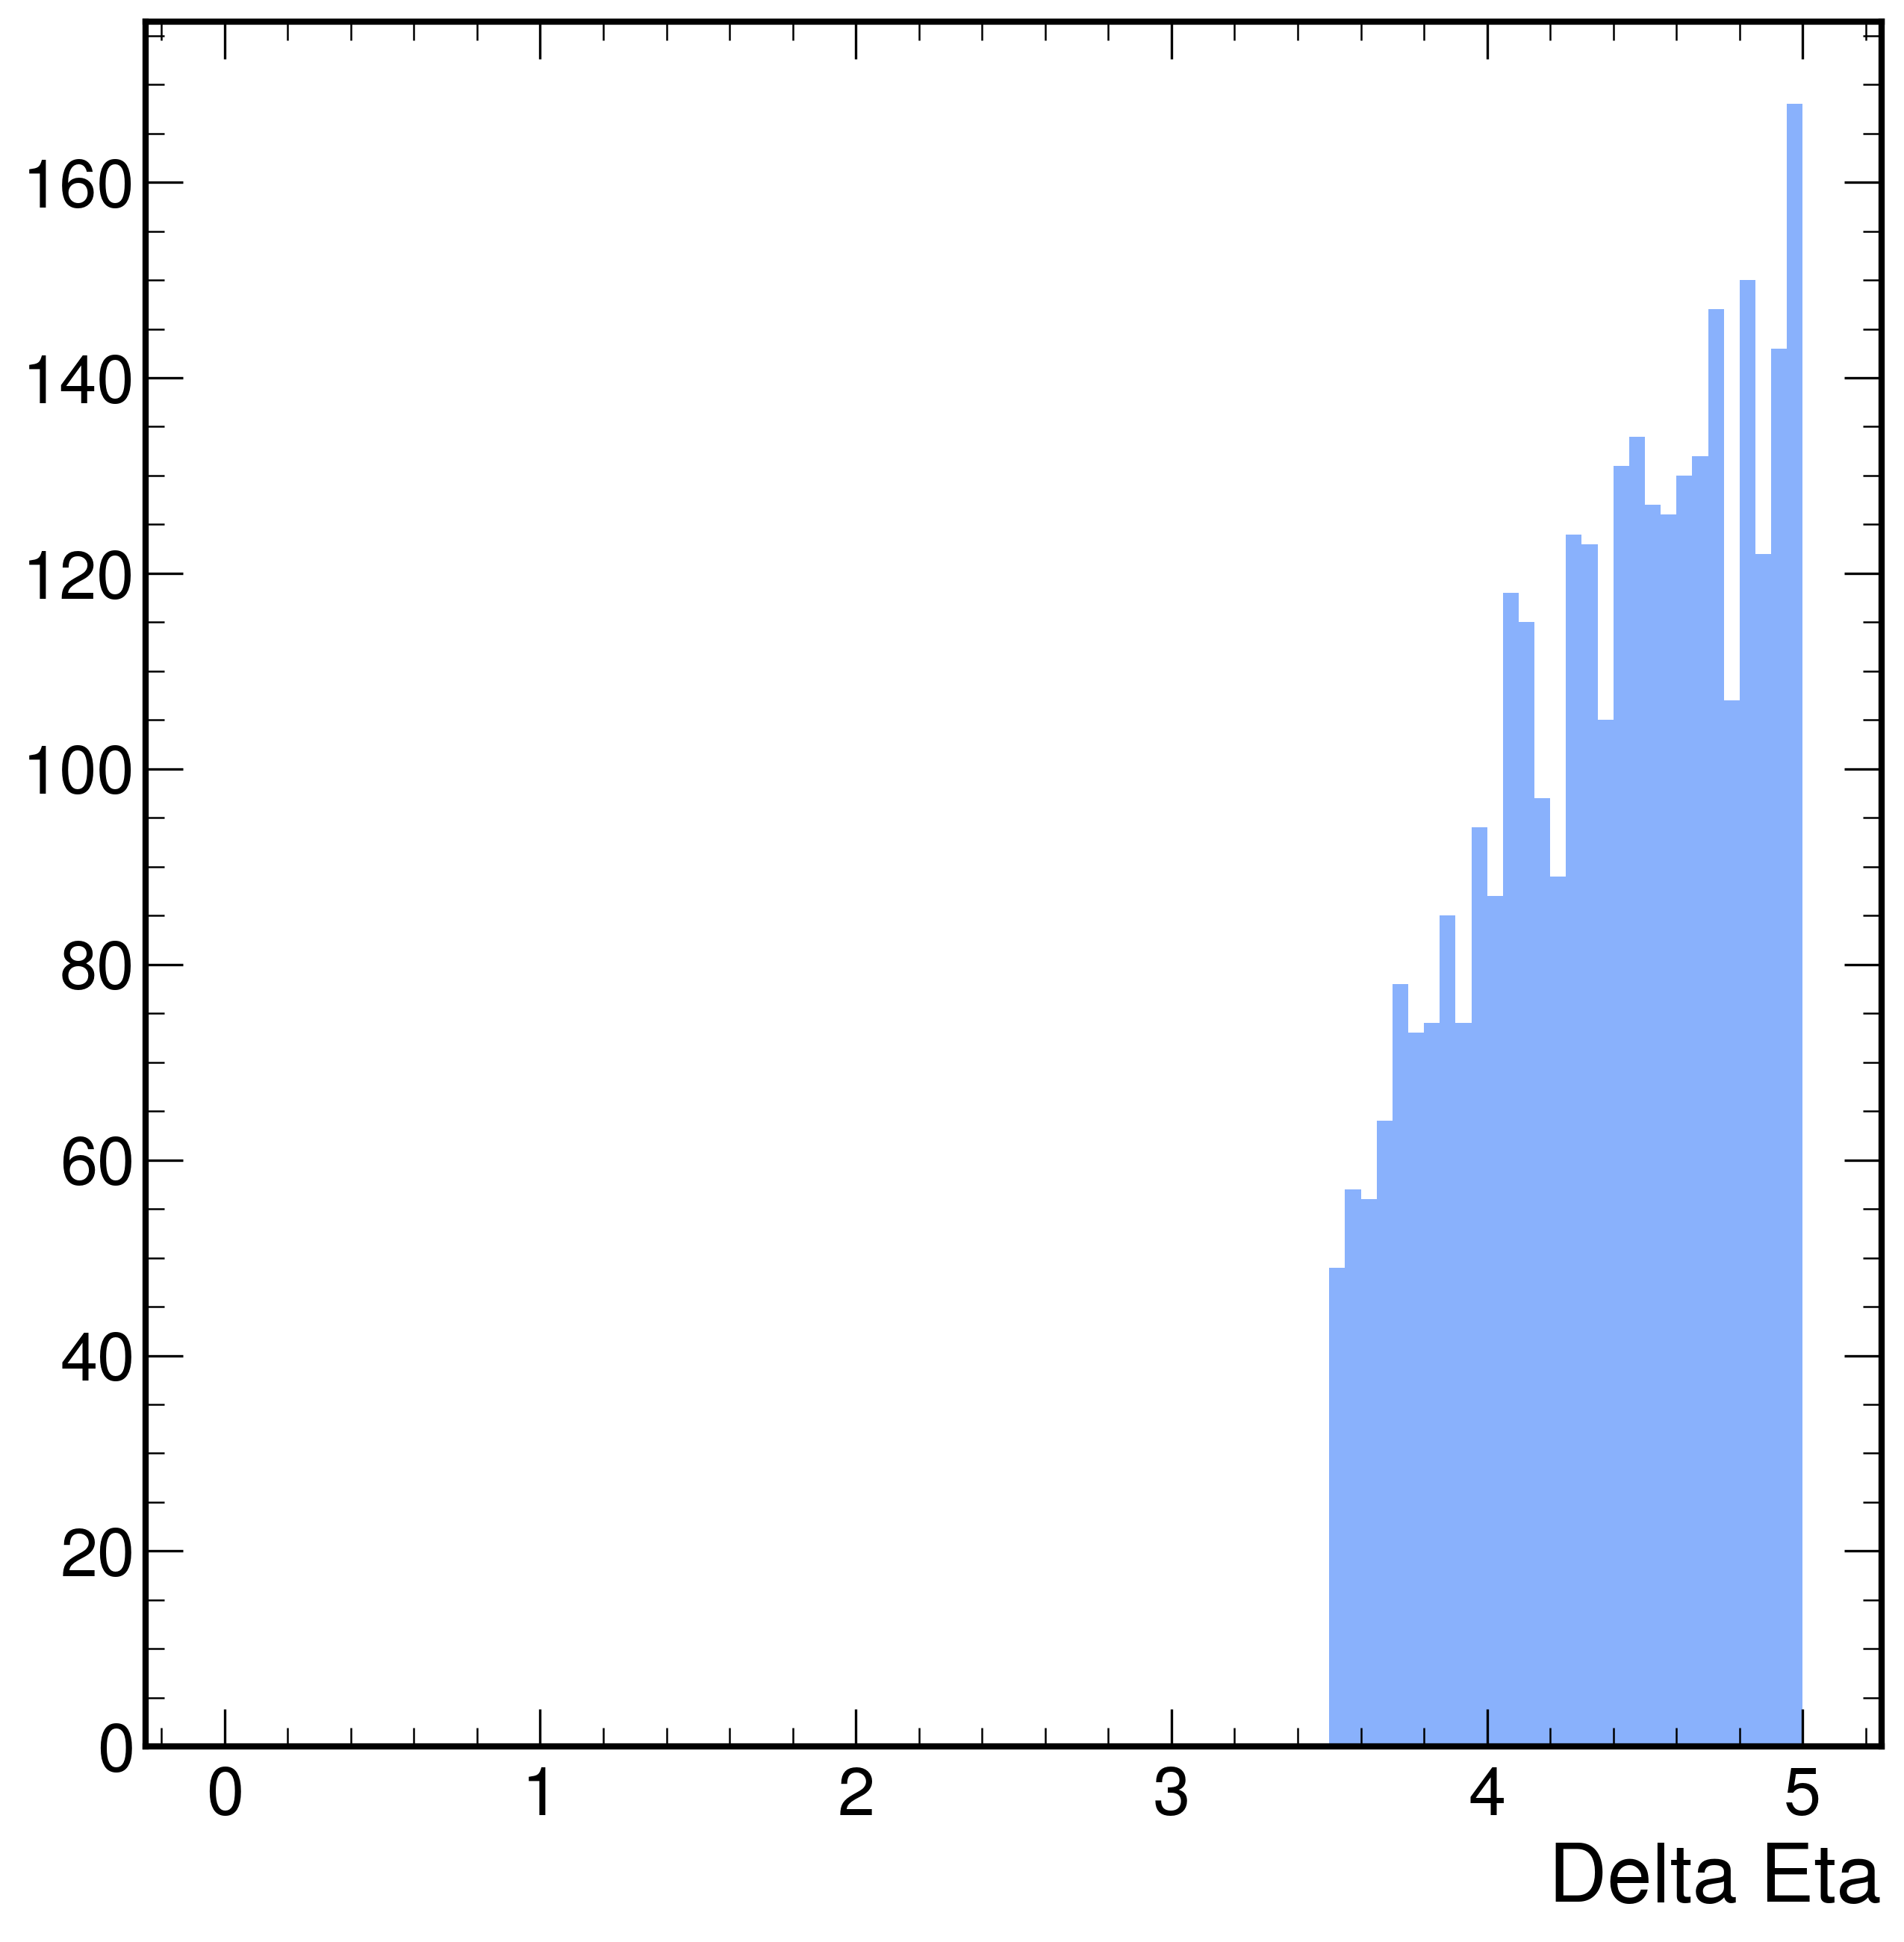

In [44]:
jet_vbf_pt_unflatten=ak.unflatten(col["JetGoodVBFMergedPadded_pt"], col["JetGoodVBFMergedPadded_N"])
jet_vbf_eta_unflatten=ak.unflatten(col["JetGoodVBFMergedPadded_eta"], col["JetGoodVBFMergedPadded_N"])
jet_vbf_phi_unflatten=ak.unflatten(col["JetGoodVBFMergedPadded_phi"], col["JetGoodVBFMergedPadded_N"])
jet_vbf_mass_unflatten=ak.unflatten(col["JetGoodVBFMergedPadded_mass"], col["JetGoodVBFMergedPadded_N"])

jet_vbf_4v=ak.zip({
    "pt": jet_vbf_pt_unflatten,
    "eta": jet_vbf_eta_unflatten,
    "phi": jet_vbf_phi_unflatten,
    "mass": jet_vbf_mass_unflatten
}, with_name="Momentum4D")

print(jet_vbf_4v.mass)
print(jet_vbf_4v.pt)
mjj=(jet_vbf_4v[:,0]+jet_vbf_4v[:,1]).mass
print(mjj)
deta=abs(jet_vbf_4v[:,0].eta - jet_vbf_4v[:,1].eta)
print(deta)

# plot mjj
plt.figure()
plt.hist(mjj, bins=100, range=(0, 1000), histtype='stepfilled', alpha=0.7)
plt.xlabel("Mjj [GeV]")
plt.show()

# plot deta
plt.figure()
plt.hist(deta, bins=100, range=(0, 5), histtype='stepfilled', alpha=0.7)
plt.xlabel("Delta Eta")
plt.show()

# check how many times prov_higgs and prov_vbf are the same in the 4b region

In [45]:
jet_t_h = ak.unflatten(
    col["JetTotalSPANetPadded_provenance_higgs"], col["JetTotalSPANetPadded_N"]
)
jet_t_v = ak.unflatten(
    col["JetTotalSPANetPadded_provenance_vbf"], col["JetTotalSPANetPadded_N"]
)
print(jet_t_h)
print(jet_t_v)
print(len(col["weight"]), num_events)
# check when the collection have in the same spot 1, 2, or 3

matches_higgs = (jet_t_h == 1) | (jet_t_h == 2)
matches_vbf = jet_t_v == 3
print(matches_higgs)
print(matches_vbf)

matches_both = matches_higgs & matches_vbf
num_matches_higgs = ak.sum(matches_higgs)
num_matches_vbf = ak.sum(matches_vbf)
num_matches_both = ak.sum(matches_both)
print(f"Number of matched Higgs jets: {num_matches_higgs}")
print(f"Number of matched VBF jets: {num_matches_vbf}")
print(f"Number of matched both Higgs and VBF jets: {num_matches_both}")

# now do the same but for each event
mached_both_per_event = ak.any(matches_both, axis=1)
print(mached_both_per_event, ak.sum(mached_both_per_event))
print(
    f"percentage of events with at least one jet matched to both Higgs and VBF in category {category}: {(ak.sum(mached_both_per_event) / num_events*100):.2f} %"
)

# check when the match both but only for the first 5 jets in the event
matches_both_first5 = matches_both[:, :5]
print(
    f"percentage of events with at least one jet matched to both Higgs and VBF in category {category} (first 5 jets only -> only JetGood): {(ak.sum(matches_both_first5) / num_events*100):.2f} %"
)


# print("percentage of jets matched to both Higgs and VBF:",
#       ak.sum(num_matches_both) / (2*num_events)*100, "%")

[[2, 1, 1, 2, -999, -999, -999, -999, ... 2, 2, 1, -999, -999, -999, -999, -999]]
[[-999, -999, -999, -999, -999, 3, 3, -999, ... -999, -999, -999, 3, 3, -999, -999]]
18869 18869
[[True, True, True, True, False, False, ... True, False, False, False, False, False]]
[[False, False, False, False, False, True, ... False, True, True, False, False]]
Number of matched Higgs jets: 74694
Number of matched VBF jets: 34676
Number of matched both Higgs and VBF jets: 104
[False, False, False, False, False, False, ... False, False, False, False, False] 104
percentage of events with at least one jet matched to both Higgs and VBF in category vbf_4b_region: 0.55 %
percentage of events with at least one jet matched to both Higgs and VBF in category vbf_4b_region (first 5 jets only -> only JetGood): 0.53 %
